In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.diagnostic import het_breuschpagan

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

%matplotlib inline

In [2]:
import statsmodels.api as sm



In [3]:
from sqlalchemy import create_engine
from IPython.display import display_html

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# No need for an open connection, because only doing a single query
engine.dispose()


df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [5]:
df['temp_diff'] = df['temperature'] - df['apparenttemperature']

In [6]:
X = df[['humidity', 'windspeed']]
y = df['temp_diff']

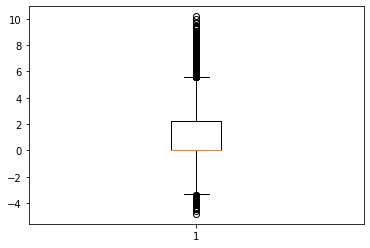

In [7]:
plt.boxplot(df['temp_diff'])
plt.show()

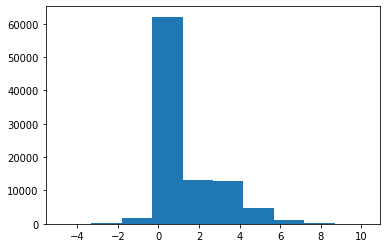

In [8]:
plt.hist(df['temp_diff'])
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
X_train_const = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_const).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.567e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:22:04   Log-Likelihood:            -1.3620e+05
No. Observations:               77162   AIC:                         2.724e+05
Df Residuals:                   77159   BIC:                         2.724e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4379      0.023   -104.020      0.000      -2.484      -2.392
humidity       3.0282      0.027    113.311      0.000       2.976       3.081
windspeed      0.1190      0.001    157.870      0.000       0.117       0.120
==============================================================================
Omnibus:                     3096.421   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3635.635
Skew:                           0.471   Prob(JB):                         0.00
Kurtosis:                       3.492   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both p-values for the independent vars are significant. The model is temperature difference = -2.4379 + 3.03humidity + 0.119windspeed which says that for each increase in humidity, temperature difference increases 3.03 degrees. For each 1 mph increase in windspeed, temperature difference increases by 0.119 degrees. 

In [11]:
df["humid_wind_interaction"] = df.humidity * df.windspeed

In [12]:
X2 = df[['humid_wind_interaction', 'humidity', 'windspeed']]

In [13]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state = 42)

In [14]:
X2_train_const = sm.add_constant(X2_train)
lm2 = sm.OLS(y_train, X2_train_const).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.335e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:22:05   Log-Likelihood:            -1.3322e+05
No. Observations:               77162   AIC:                         2.664e+05
Df Residuals:                   77158   BIC:                         2.665e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1056      0.037     -2.837      0.005      -0.179      -0.033
humid_wind_interaction     0.2943      0.004     78.736      0.000       0.287       0.302
humidity                  -0.1488      0.048     -3.111      0.002      -0.243      -0.055
windspeed                 -0.0889      0.003    -32.463      0.000      -0.094      -0.083
==============================================================================
Omnibus:                     3874.274   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7621.547
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                       4.351   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 increased and we now account for more variance. The model is now temperature difference = -0.1056 + 0.2943interation - 0.1488humidity -0.0889windspeed.  All coeffs remain significant but have changed to being both negative coeffs. With each increase in 1 unit of interaction between humidity and windspeed, temperature diffence increases by 0.2943 degrees. With each increase in percent humidity, temperature difference decreases by 0.1488 degrees. With each increase in windspeed mph, temperature difference decreases by 0.0889 degrees. 

R2 has increased from our 1st model where it was 0.289 to our 2nd model with an R2 of .342 so it appears to capture more of the variance in the target but its still not good. Adjusted R2 has increased by the same amount as well. Our F statistic has a low pvalue in both models but has decreased from the first model from 15670 to 13350, however, both our IC scores decreased so I'm really not sure which model is better since I would really go back and add more variables at this point.

In [16]:
# created 3rd model
X3 = df[['humidity', 'windspeed','visibility']]

In [17]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state = 42)

In [18]:
X3_train_const = sm.add_constant(X3_train)
lm3 = sm.OLS(y_train, X3_train_const).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:27:01   Log-Likelihood:            -1.3535e+05
No. Observations:               77162   AIC:                         2.707e+05
Df Residuals:                   77158   BIC:                         2.707e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5833      0.031    -51.024      0.000      -1.644      -1.522
humidity       2.6112      0.028     92.321      0.000       2.556       2.667
windspeed      0.1196      0.001    160.378      0.000       0.118       0.121
visibility    -0.0535      0.001    -41.434      0.000      -0.056      -0.051
==============================================================================
Omnibus:                     3016.971   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3616.395
Skew:                           0.453   Prob(JB):                         0.00
Kurtosis:                       3.552   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The 3rd model performs somewhere between model1 and model 2. The R2 and adj R2 dropped but is still better than the 1st model. The F statistic is significant but dropped even lower than our 1st model. Also, both IC scores increased suggesting model 3 is worse than model 1. I would go back and introduce more variabes, do othe interactions or look at distributions.